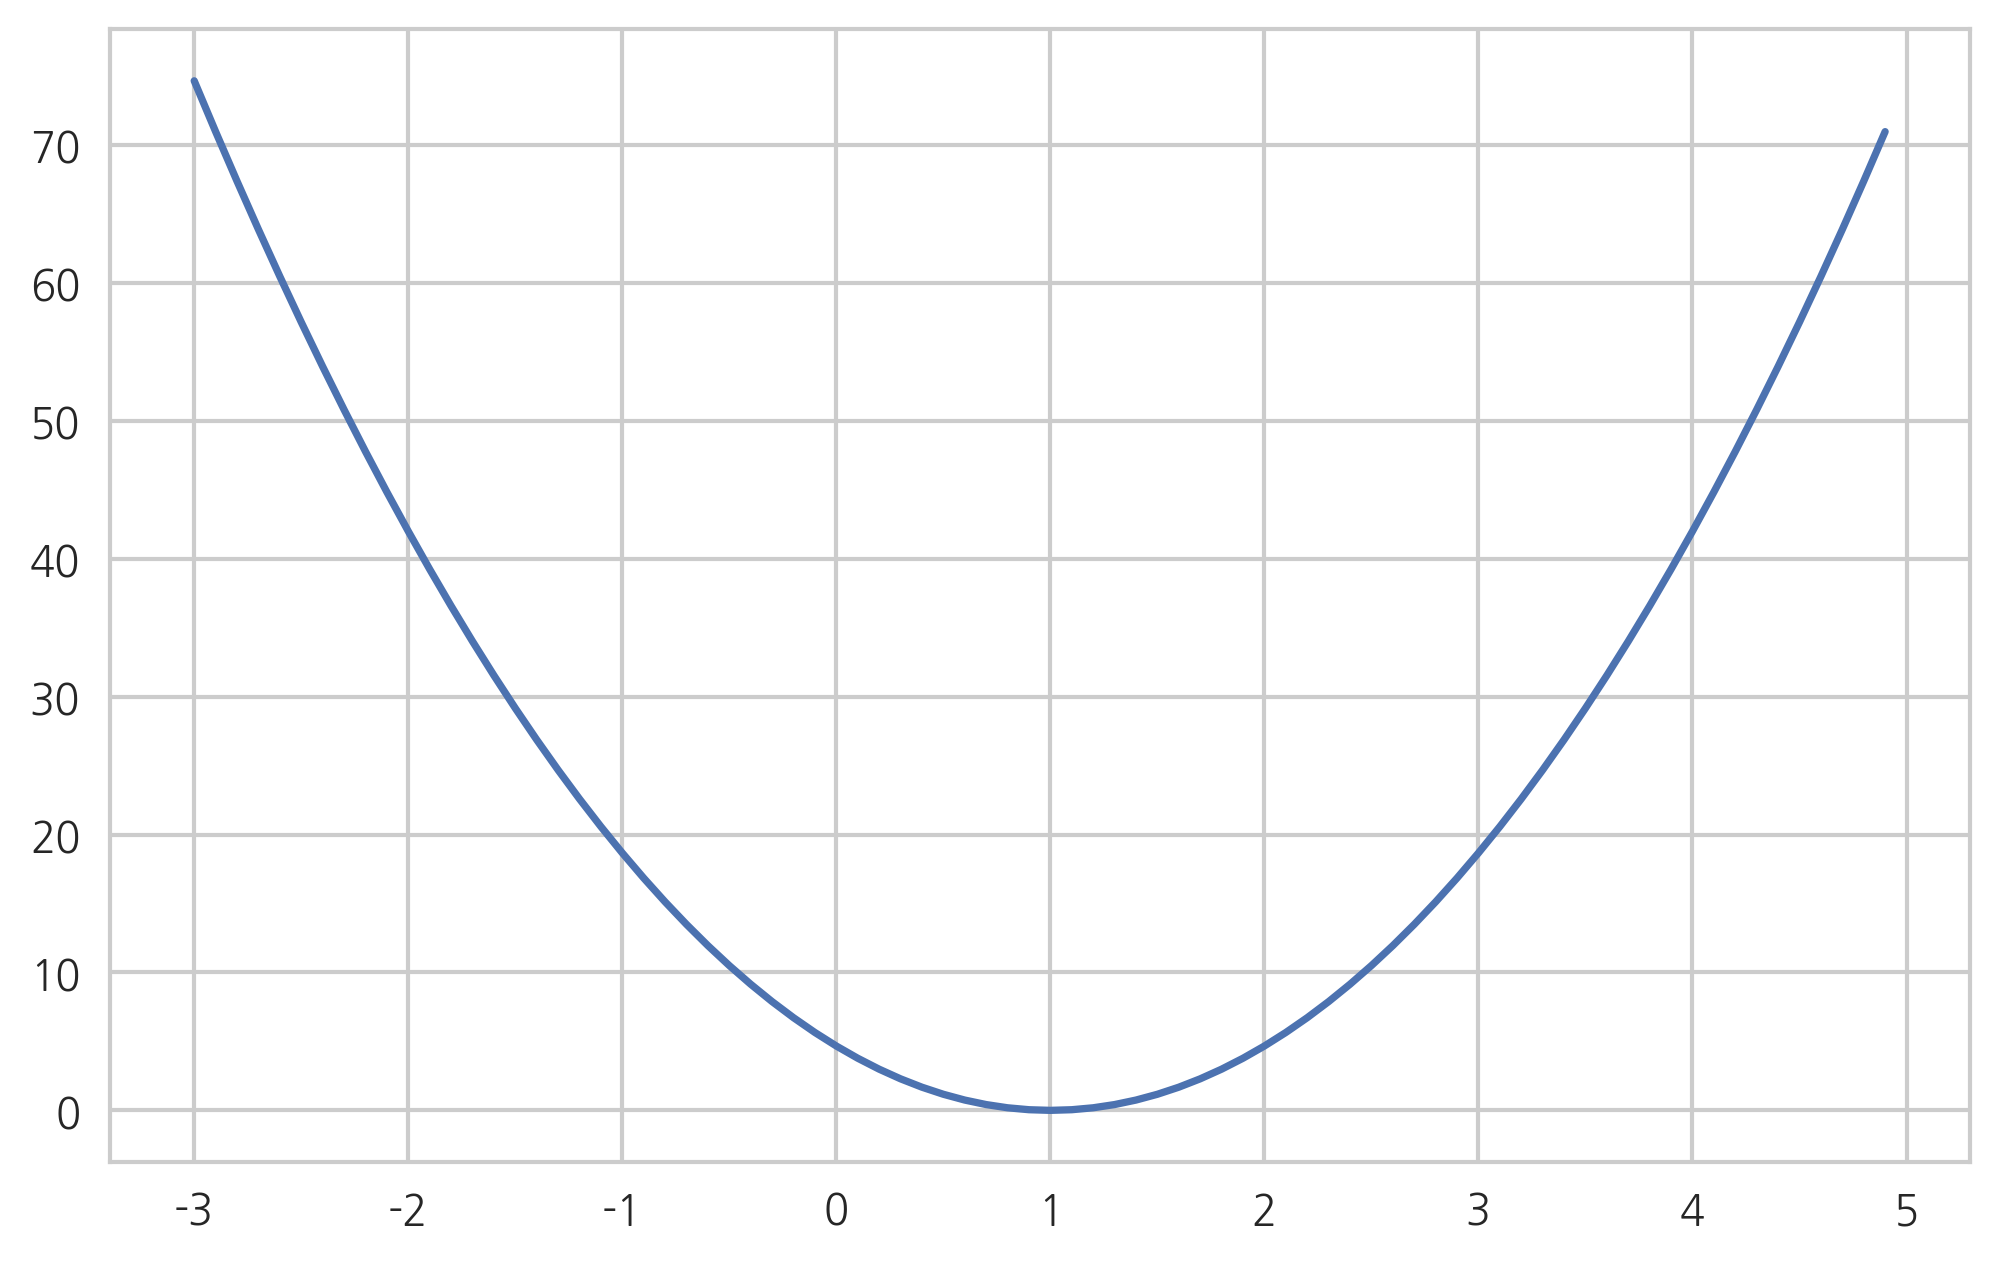

In [3]:
# Lab 3 Minimizing Cost
import tensorflow as tf
import matplotlib.pyplot as plt
#tf.set_random_seed(777)  # for reproducibility

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# Variables for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost,W], feed_dict={W: feed_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

In [5]:
#gradient 쪼개보자!!  


x_data = [1,2,3]
y_data = [1,2,3]
W = tf.Variable(tf.random_normal([1]), name='weight') #무슨값을 주느냐에 따라 속도가 다르다! 5, -3 넣어보면 알수있음
 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
 
# Our hypothesis for linear model X * W
hypothesis = X * W
 
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

'''
cost fn을 최소화시키는 W를 찾는 것이 gradient이다.! 

'''


# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative(gradient !!)
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
 
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
 
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    
    '''
sess.run(update)할때마다 minimize함수가 사용되면서 미분이 실행되고 cost가 떨어지게 된다. 
'''

0 1.31736 [ 0.46868867]
1 0.374716 [ 0.71663398]
2 0.106586 [ 0.84887147]
3 0.0303177 [ 0.91939813]
4 0.00862371 [ 0.95701236]
5 0.00245296 [ 0.97707325]
6 0.000697734 [ 0.98777241]
7 0.000198467 [ 0.9934786]
8 5.64542e-05 [ 0.99652189]
9 1.60588e-05 [ 0.99814498]
10 4.56726e-06 [ 0.99901068]
11 1.29912e-06 [ 0.99947238]
12 3.69551e-07 [ 0.99971861]
13 1.05083e-07 [ 0.99984992]
14 2.98938e-08 [ 0.99991995]
15 8.49949e-09 [ 0.99995732]
16 2.4139e-09 [ 0.99997723]
17 6.89965e-10 [ 0.99998784]
18 1.97755e-10 [ 0.9999935]
19 5.66018e-11 [ 0.99999654]
20 1.57137e-11 [ 0.99999815]
